In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import qim3d

%matplotlib inline

In [3]:
# Define function for getting dataset path from string
def get_dataset_path(name: str, datasets):
    assert name in datasets, 'Dataset name must be ' + ' or '.join(datasets)
    dataset_idx = datasets.index(name)
    datasets_path = [
        '/dtu/3d-imaging-center/projects/2023_STUDIOS_SD/analysis/data/Belialev2020/side',
        '/dtu/3d-imaging-center/projects/2023_STUDIOS_SD/analysis/data/Gaudez2022/3d',
        '/dtu/3d-imaging-center/projects/2023_STUDIOS_SD/analysis/data/Guo2023/2d/',
        '/dtu/3d-imaging-center/projects/2023_STUDIOS_SD/analysis/data/Stan2020/2d',
        '/dtu/3d-imaging-center/projects/2023_STUDIOS_SD/analysis/data/Reichardt2021/2d',
        '/dtu/3d-imaging-center/projects/2023_STUDIOS_SD/analysis/data/TestCircles/2d_binary'
    ]
    return datasets_path[dataset_idx]

### Datasets

In [4]:
datasets = ['belialev2020_side', 'gaudez2022_3d', 'guo2023_2d', 'stan2020_2d', 'reichardt2021_2d', 'testcircles_2dbinary']
dataset = datasets[3] 
root = get_dataset_path(dataset,datasets)

# should not use gaudez2022: 3d image
# reichardt2021: multiclass segmentation

### Model and Augmentation

In [5]:
# defining model
my_model = qim3d.models.UNet(size = 'medium',kernel_size = 3)
# defining augmentation
my_aug = qim3d.utils.Augmentation(resize = None, transform_train = 'moderate')

### Loading the data

In [6]:
# level of logging
qim3d.io.logger.level('info')

# datasets and dataloaders
train_set, val_set, test_set = qim3d.utils.prepare_datasets(path = root, val_fraction = 0.3, model = my_model , augmentation = my_aug)
train_loader, val_loader, test_loader = qim3d.utils.prepare_dataloaders(train_set, val_set, test_set, batch_size = 8)

User did not choose a specific value for 'resize'. Checking the first image in the dataset...
The image size doesn't match the Unet model's depth. The image is resized to: (832, 832)


In [7]:
# Summary of model
model_s = qim3d.utils.model_summary(train_loader,my_model)
# print(model_s)

### Hyperparameters and training

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch   0, train loss: 0.3575, val loss: 0.2807
Epoch   5, train loss: 0.0869, val loss: 0.0873
Epoch  10, train loss: 0.0471, val loss: 0.0528
Epoch  15, train loss: 0.0332, val loss: 0.0383


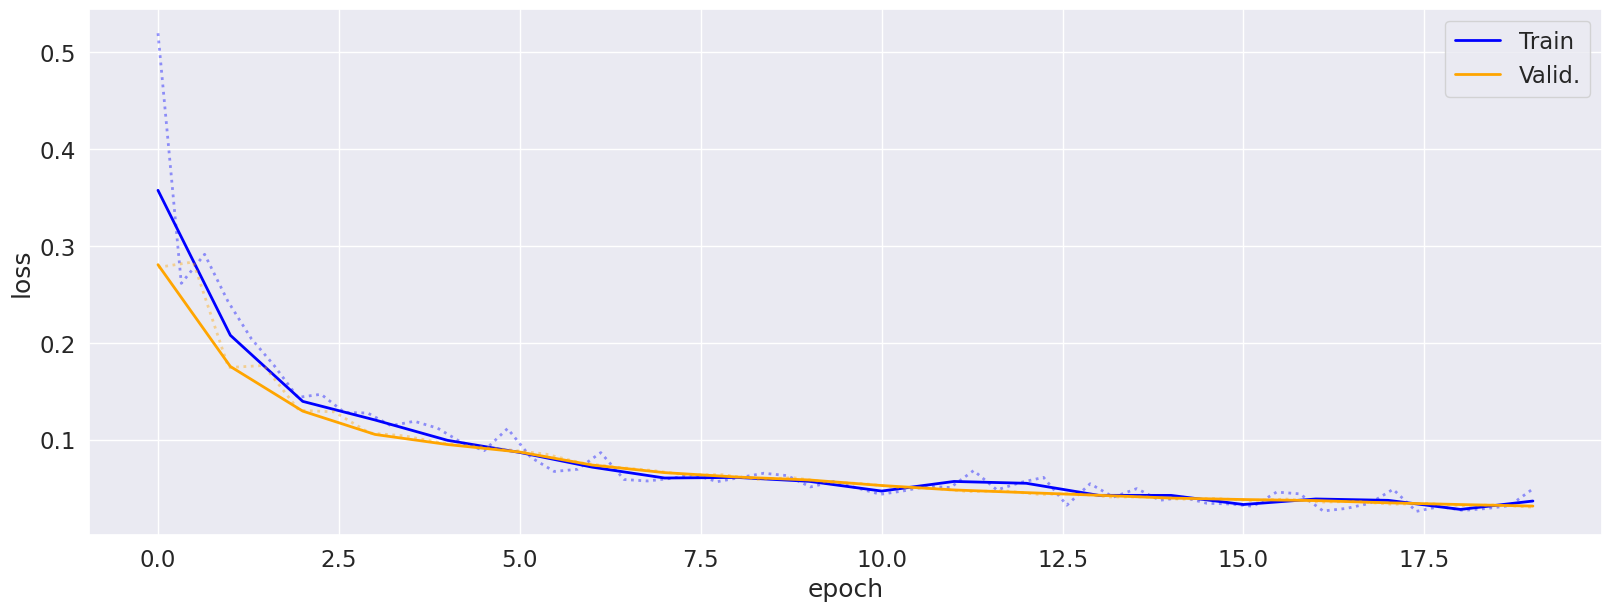

In [8]:
# model hyperparameters
my_hyperparameters = qim3d.models.Hyperparameters(my_model, n_epochs=20, learning_rate = 1e-4)

# training model
qim3d.utils.train_model(my_model, my_hyperparameters, train_loader, val_loader, plot=True)

### Plotting

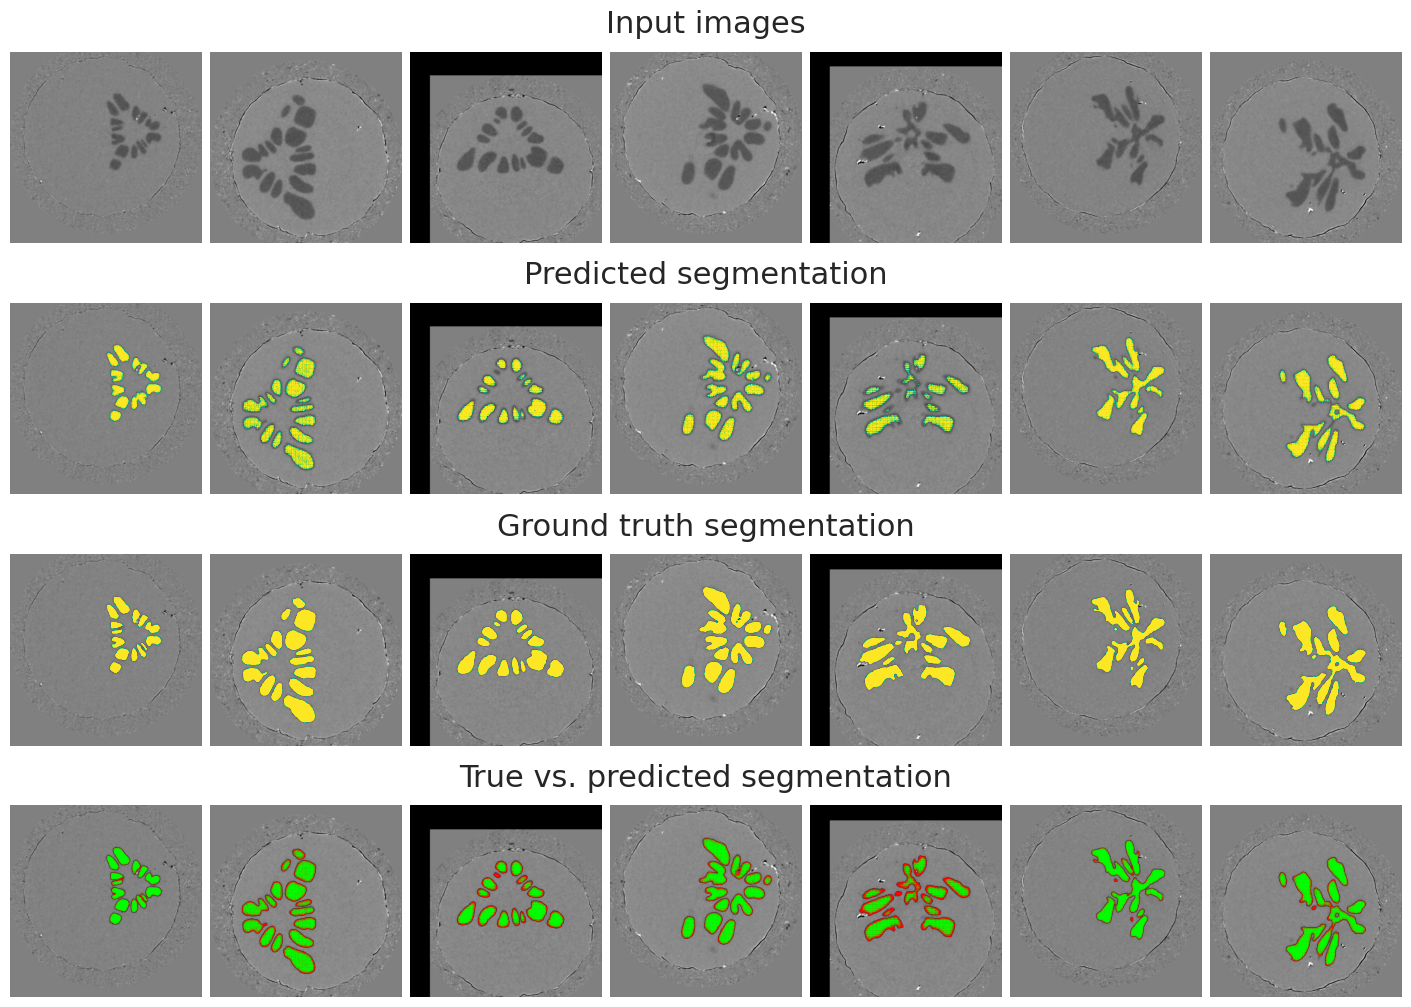

In [9]:
in_targ_preds_train = qim3d.utils.inference(train_set,my_model)
qim3d.viz.grid_pred(in_targ_preds_train,alpha=1)

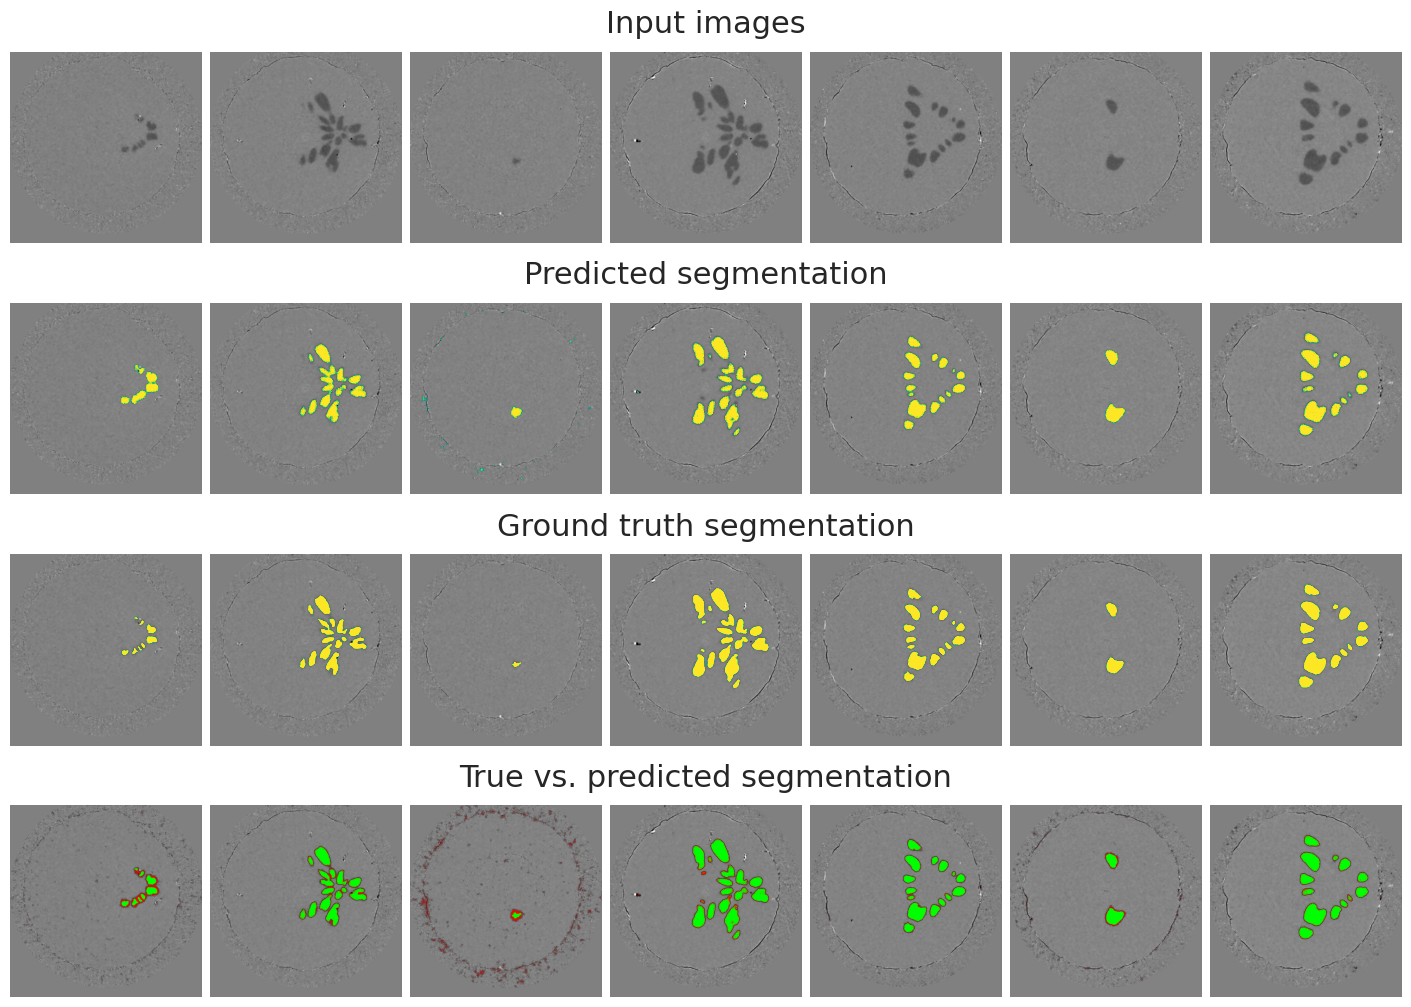

In [10]:
in_targ_preds_test = qim3d.utils.inference(test_set,my_model)
qim3d.viz.grid_pred(in_targ_preds_test,alpha=1)